In [1]:
import numpy as np
import itertools
import somatools as smt
import csv

The black debil cube is made up of the shapes A, B, G, L, T, Z as defined below.  

In [2]:
A = smt.AA
B = smt.BB
G = smt.GAB
L = smt.LL
T = smt.TTB
Z = smt.ZZB

In [3]:
tX = smt.turn3D_X
tY = smt.turn3D_Y
tZ = smt.turn3D_Z
sX = smt.shift3D_fX
sY = smt.shift3D_fY
sZ = smt.shift3D_fZ
pict = smt.show3D_shape

In [4]:
# To remove repeated element in a list
def cleaning(L):
    S =[]
    for x in L: 
        if x not in S: S.append(x)
    return S

Any shape allows three $\pi/2$ rotations. The shifting depend on each shape according to the following list 
A : (1,1,1), B: (1,1,1), G: (1,0,1), L: (1,0,2), T: (0,1,2), Z: (1,1,0)
where the first, second and third  coordinate mean  the maximum number of shiftig in the X, the Y and the Z direction respectively.    

In [5]:
def posA():
    Dm = [A]
    Mappings = [sX, sY, sZ, tX, tX, tX, tY, tY, tY, tZ, tZ, tZ]
    for f in Mappings:
        Cdm = map(f,Dm)
        Dm = list(itertools.chain(Dm,Cdm))
    return cleaning(Dm)

def posB():
    Dm = [B]
    Mappings = [sX, sY, sZ, tX, tX, tX, tY, tY, tY, tZ, tZ, tZ]
    for f in Mappings:
        Cdm = map(f,Dm)
        Dm = list(itertools.chain(Dm,Cdm))
    return cleaning(Dm)

def posG():
    Dm = [G]
    Mappings = [sX, sZ, tX, tX, tX, tY, tY, tY, tZ, tZ, tZ]
    for f in Mappings:
        Cdm = map(f,Dm)
        Dm = list(itertools.chain(Dm,Cdm))
    return cleaning(Dm)

def posL():
    Dm = [L]
    Mappings = [sX, sY, sY, tX, tX, tX, tY, tY, tY, tZ, tZ, tZ]
    for f in Mappings:
        Cdm = map(f,Dm)
        Dm = list(itertools.chain(Dm,Cdm))
    return cleaning(Dm)

def posT():
    Dm = [T]
    Mappings = [sX, sZ, tX, tX, tX, tY, tY, tY, tZ, tZ, tZ]
    for f in Mappings:
        Cdm = map(f,Dm)
        Dm = list(itertools.chain(Dm,Cdm))
    return cleaning(Dm)


def posZ():
    Dm = [Z]
    Mappings = [sX, sY, tX, tX, tX, tY, tY, tY, tZ, tZ, tZ]
    for f in Mappings:
        Cdm = map(f,Dm)
        Dm = list(itertools.chain(Dm,Cdm))
    return cleaning(Dm)

In [6]:
List_A = [np.array(x) for x in posA()]
List_B = [np.array(x) for x in posB()]
List_G = [np.array(x) for x in posG()]
List_L = [np.array(x) for x in posL()]
List_T = [np.array(x) for x in posT()]
List_Z = [np.array(x) for x in posZ()]

In [7]:
print(len(List_A), len(List_B), len(List_G),len(List_L),len(List_T), len(List_Z) )

96 96 96 216 96 48


In [8]:
def check_ok(x):
    return sum(x[0]*x[1]) == 0

def supercheck_ok(x):
    return sum(sum(x[0])*x[1]) == 0

In [9]:
def join(H, K):
    raw = itertools.product(H, K)
    HK =  np.array(list(filter(supercheck_ok,raw)) )
    return [np.vstack([z[0], z[1]]) for z in HK]

In [10]:
AB_raw  = itertools.product(List_A, List_B)
AB = np.array(list(filter(check_ok,AB_raw)))

In [12]:
len(AB)

3768

In [14]:
%time ABG = join(AB, List_G)

CPU times: user 1.87 s, sys: 8 ms, total: 1.88 s
Wall time: 1.87 s


In [18]:
ABGL = join(ABG, List_L)

In [19]:
len(ABGL)

949392

In [20]:
ABGLT = join(ABGL, List_T)

In [21]:
len(ABGLT)

316296

In [ ]:
z = ABGLT[56]
z

In [22]:
Cube = join(ABGLT, List_Z)

In [19]:
len(Cube)

48

In [23]:
lista = [x.tolist() for x in Cube]

In [24]:
nlista = cleaning(lista)

In [25]:
len(nlista) 

48

In [31]:
juan = [
    [0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0],
    [0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0],
    [1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1],
    [0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0]
]

mauro1 = [
    [0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0],
    [0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1],
    [0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0]
]

mauro2 = [
    []
]

In [33]:
x = mauro1
y = juan
if x in nlista:
    print(nlista.index(x))

33


In [44]:
clase_juan = [juan]
Mappings = [tX, tX, tX, tY, tY, tY, tZ, tZ, tZ]
for f in Mappings:
    Cdm = map(f,clase_juan)
    clase_juan = list(itertools.chain(clase_juan,Cdm))
    

IndexError: list index out of range

In [43]:
juanZ- np.array(mauro1)

array([[ 1,  0, -1,  1,  1, -1,  0,  0,  0,  1, -1, -1,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0, -1,  1,  0,
         0,  0, -1, -1,  0,  0, -1,  0,  0,  0],
       [ 0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  1,  0,  0,  0,  0,  0,  0,
        -1,  1,  1,  0,  1,  0,  0,  0,  0,  0],
       [-1,  0,  1, -1,  0,  1,  0,  0,  1, -1,  0,  1,  0,  0,  0,  0,  0,
         0, -1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
         1,  0,  0,  0, -1,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  1, -1,  1,
         0,  0,  0,  1,  0, -1,  1,  0,  0,  0]])

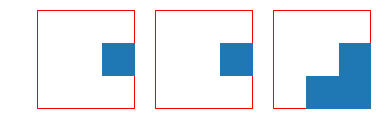

In [26]:
pict(z[2])

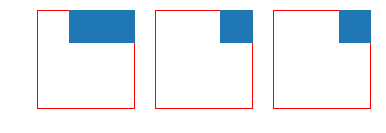

In [27]:
pict(z[3])

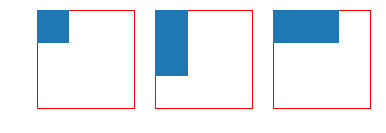

In [28]:
pict(z[4])

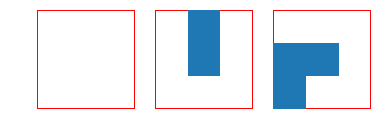

In [29]:
pict(z[5])

In [ ]:
720/24

In [30]:
with open('Cube.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows("C")
    for i in range(len(Cube)):
        row = Cube[i] 
        writer.writerow(row)

In [31]:
List_A = posA()
with open('posA.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows("A")
    for i in range(len(List_A)):
        row = List_A[i] 
        writer.writerow(row)

In [32]:
List_B = posB()
with open('posB.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows("B")
    for i in range(len(List_B)):
        row = List_B[i] 
        writer.writerow(row)

In [33]:
List_G = posG()
with open('posG.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows("G")
    for i in range(len(List_G)):
        row = List_G[i] 
        writer.writerow(row)

In [34]:
List_L = posL()
with open('posL.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows("L")
    for i in range(len(List_L)):
        row = List_L[i] 
        writer.writerow(row)

In [35]:
List_T = posT()
with open('posT.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows("T")
    for i in range(len(List_T)):
        row = List_T[i] 
        writer.writerow(row)

In [36]:
List_Z = posZ()
with open('posZ.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows("Z")
    for i in range(len(List_Z)):
        row = List_Z[i] 
        writer.writerow(row)

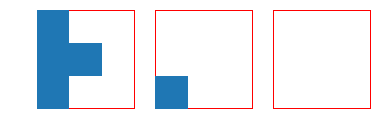

In [9]:
pict(T)

In [ ]:
pict(List_Z[27])

In [ ]:
list2d = [[1,2,3],[4,5,6], [7], [8,9]]
merged = list(itertools.chain(*list2d))

In [ ]:
merged
